# Bildverarbeitung

In diesem Beispiel geht es um verschiedene Arten der Bildverarbeitung mit Code-Beispielen.

### OpenCV

OpenCV wird vor allem in den Bereichen computer vision, Objekterkennung, Gesichtserkennung, Bildsegmentierung, etc. verwendet. Einige Funktionen können aber auch im maschinellen Lernen anwendung finden.

In [2]:
# Import der Bibliotheken für alle OpenCV Beispiele
import cv2 as cv # opencv-python installieren
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from scipy import ndimage
from PIL import Image

##### Anzeigen der Dimensionen des Bildes

In [3]:
img = cv.imread('Goku.png')
dimensions = img.shape

height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print('Dimensionen des Bildes    : ',dimensions)
print('Höhe                      : ',height)
print('Breite                    : ',width)
print('Anzahl der Kanäle         : ',channels)

Dimensionen des Bildes    :  (4396, 4240, 3)
Höhe                      :  4396
Breite                    :  4240
Anzahl der Kanäle         :  3


##### Graustufen

Farbige Bilder bestehen aus 3 Farbkanälen, wobei Graustufenbilder nur 1 Farbkanal haben. Dadurch können Informationen über die Intensität der Pixel gewonnen werden.

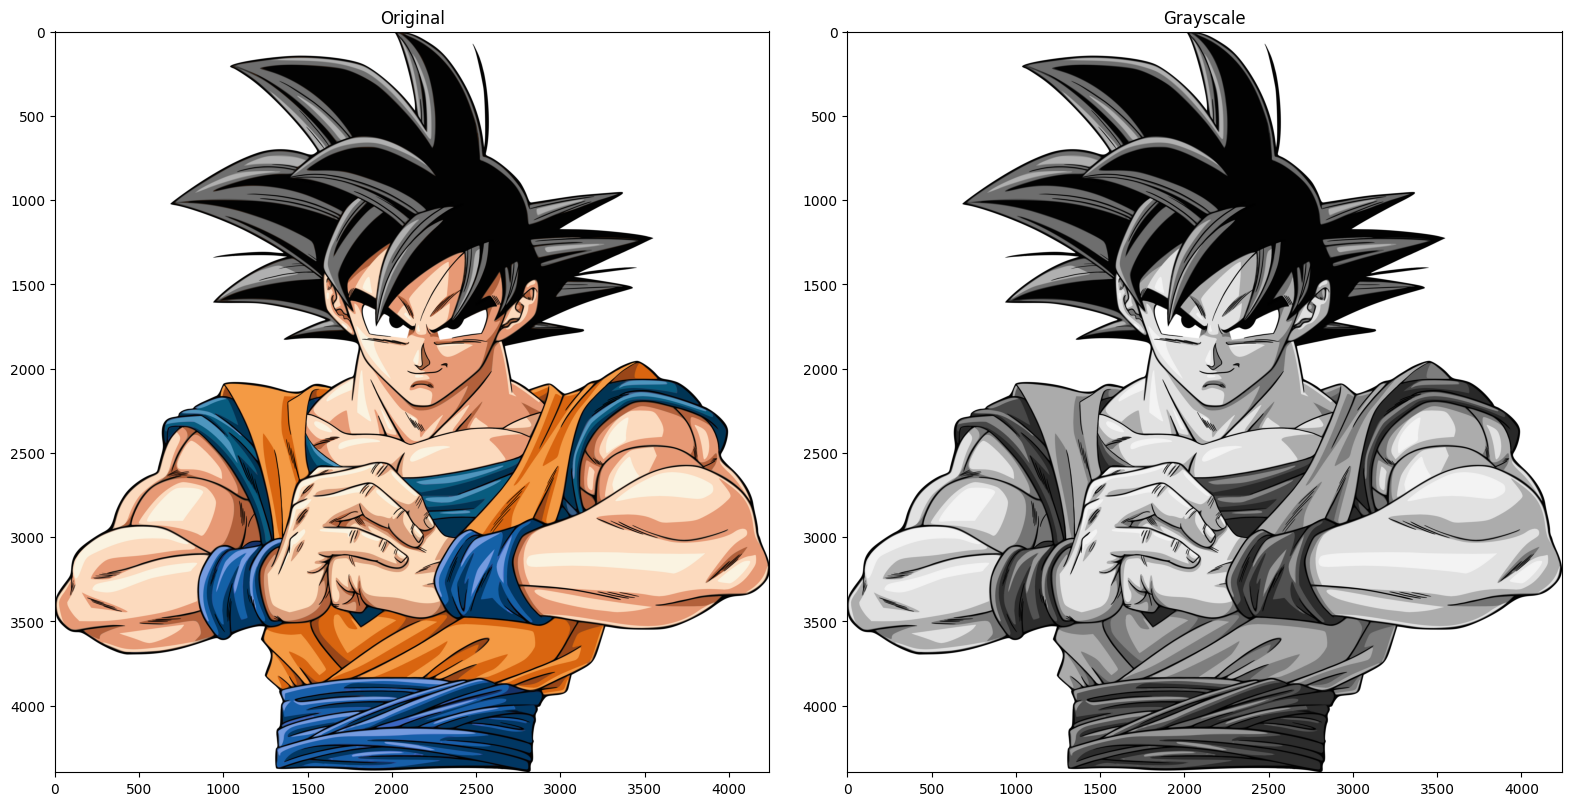

In [4]:
img = cv.imread('Goku.png')
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv.cvtColor(gray_image, cv.COLOR_BGR2RGB))
ax[1].set_title("Grayscale")
plt.show()

##### Separieren der Farbkanäle

Der nachfolgende Code separiert die 3 Farbkanäle und gibt davon Graustufenbilder aus.

Text(0.5, 1.0, 'Blue')

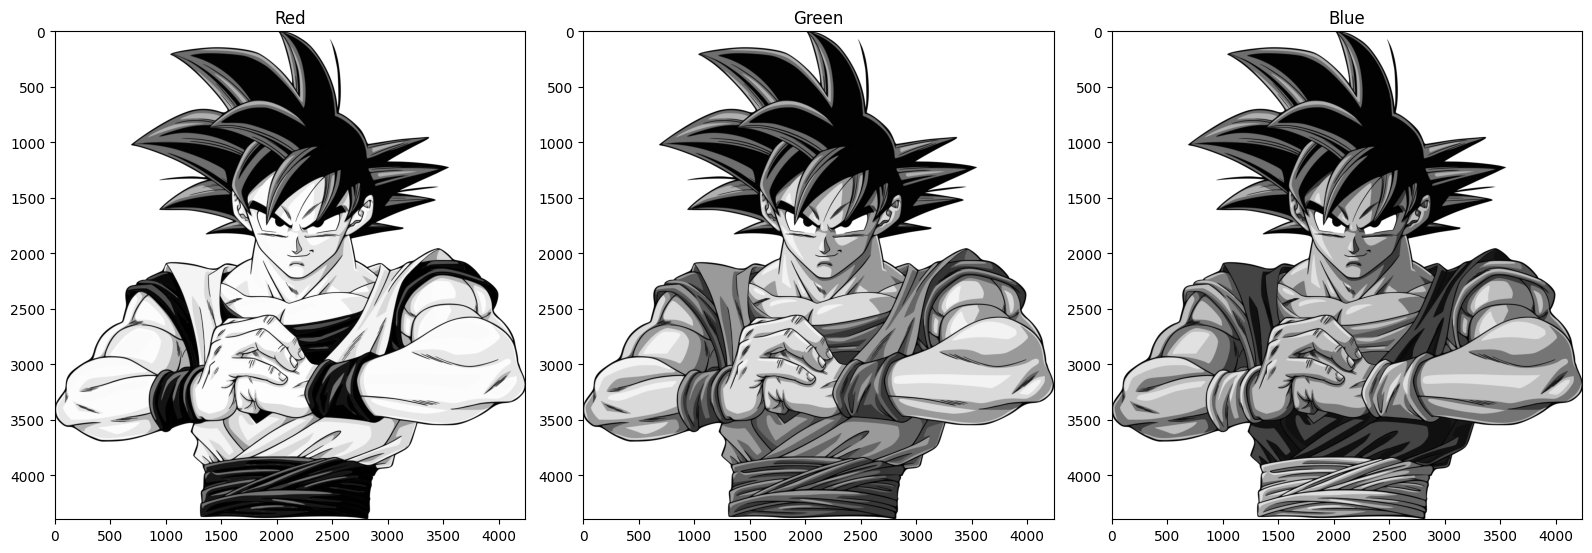

In [5]:
img = cv.imread('Goku.png')
b, g, r = cv.split(img)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(r, cv.COLOR_BGR2RGB))
ax[0].set_title("Red")

ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("Green")

ax[2].imshow(cv.cvtColor(b, cv.COLOR_BGR2RGB))
ax[2].set_title("Blue")

##### Verschieben des Bildes

In [6]:
print('Vertikal:')
vk = wg.IntSlider( value=400,min=-4000,step=100, max=4000)
display(vk)

print('Horizontal:')
ht = wg.IntSlider( value=800,min=-4000,step=100, max=4000)
display(ht)

Vertikal:


IntSlider(value=400, max=4000, min=-4000, step=100)

Horizontal:


IntSlider(value=800, max=4000, min=-4000, step=100)

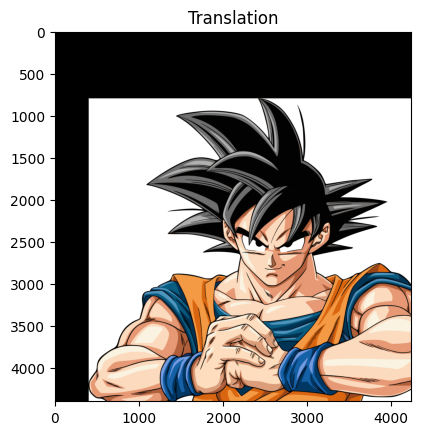

In [7]:
image = cv.imread("Goku.png")
h, w = image.shape[:2]

height, width = h //vk.value, w //ht.value
transition_matrix = np.float32([[1, 0, vk.value],
                               [0, 1, ht.value]])

img_transition = cv.warpAffine(image, transition_matrix, (w, h))

plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.show()

##### Bild drehen

In [8]:
print('Drehung:')
d = wg.IntSlider( value=-180,min=-360,step=1, max=360)
display(d)

print('Größe:')
g = wg.FloatSlider( value=1,min=0.1,step=0.1, max=2)
display(g)

Drehung:


IntSlider(value=-180, max=360, min=-360)

Größe:


FloatSlider(value=1.0, max=2.0, min=0.1)

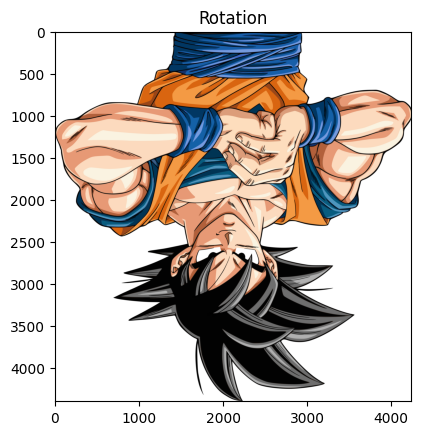

In [9]:
image = cv.imread("Goku.png")

h, w = image.shape[:2]
rotation_matrix = cv.getRotationMatrix2D((w/2,h/2), d.value, g.value)

rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

##### Skalierung und Größenänderung

In [10]:
print('x-Achse:')
xa = wg.FloatSlider( value=0.5,min=0.01,step=0.05, max=2)
display(xa)

print('y-Achse:')
ya = wg.FloatSlider( value=0.5,min=0.01,step=0.05, max=2)
display(ya)

x-Achse:


FloatSlider(value=0.5, max=2.0, min=0.01, step=0.05)

y-Achse:


FloatSlider(value=0.5, max=2.0, min=0.01, step=0.05)

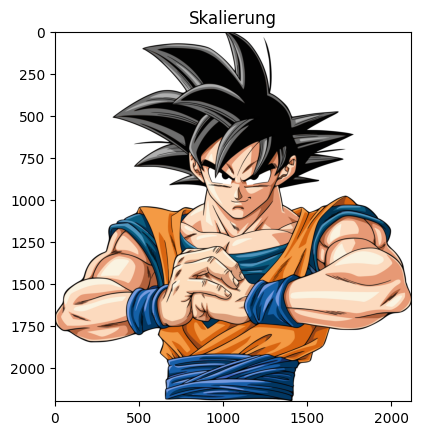

In [11]:
image = cv.imread("Goku.png")
image_scaled = cv.resize(image, None, fx=xa.value, fy=ya.value)
plt.imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
plt.title("Skalierung")
plt.show()

Die Achsen geben die Anzahl der Pixel an

##### Auf Bildern Zeichnen

In [12]:
print('Start X:')
sx = wg.IntSlider( value=50,min=0,step=1, max=4240)
display(sx)

print('Start Y:')
sy = wg.IntSlider( value=50,min=0,step=1, max=4396)
display(sy)

print('Ende X:')
ex = wg.IntSlider( value=3000,min=0,step=1, max=4240)
display(ex)

print('Ende Y:')
ey = wg.IntSlider( value=3000,min=0,step=1, max=4396)
display(ey)

print('Stärke:')
st = wg.IntSlider( value=5,min=0,step=1, max=80)
display(st)

print('Rot:')
fr = wg.IntSlider( value=0,min=0,step=1, max=255)
display(fr)

print('Grün:')
fg = wg.IntSlider( value=0,min=0,step=1, max=255)
display(fg)

print('Blau:')
fb = wg.IntSlider( value=255,min=0,step=1, max=255)
display(fb)

Start X:


IntSlider(value=50, max=4240)

Start Y:


IntSlider(value=50, max=4396)

Ende X:


IntSlider(value=3000, max=4240)

Ende Y:


IntSlider(value=3000, max=4396)

Stärke:


IntSlider(value=5, max=80)

Rot:


IntSlider(value=0, max=255)

Grün:


IntSlider(value=0, max=255)

Blau:


IntSlider(value=255, max=255)

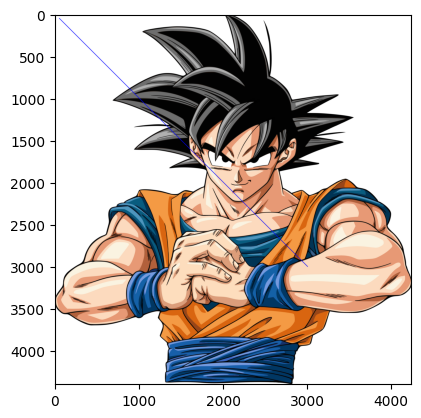

In [13]:
#Eine Linie zeichnen
image = cv.imread("Goku.png")
imageCopy = image.copy()
line = cv.line(imageCopy,(sx.value,sy.value),(ex.value,ey.value),(fb.value,fg.value,fr.value),st.value)
plt.imshow(cv.cvtColor(line, cv.COLOR_BGR2RGB))

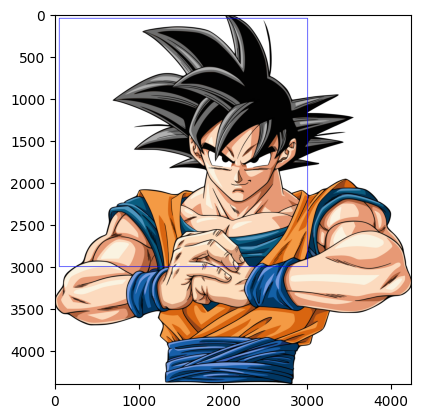

In [14]:
# Ein Rechteck zeichnen
image = cv.imread("Goku.png")
imageCopy = image.copy()
rectangle= cv.rectangle(imageCopy,(sx.value,sy.value),(ex.value,ey.value),(fb.value,fg.value,fr.value),st.value)
plt.imshow(cv.cvtColor(rectangle, cv.COLOR_BGR2RGB))

In [15]:
print('Radius:')
rad = wg.IntSlider( value=400,min=1,step=1, max=4000)
display(rad)

print('Stärke:')
ct = wg.IntSlider( value=40,min=-1,step=1, max=80)
display(ct)

print('Zentrum X:')
zx = wg.IntSlider( value=2000,min=0,step=1, max=4240)
display(zx)

print('Zentrum Y:')
zy = wg.IntSlider( value=2000,min=0,step=1, max=4396)
display(zy)

Radius:


IntSlider(value=400, max=4000, min=1)

Stärke:


IntSlider(value=40, max=80, min=-1)

Zentrum X:


IntSlider(value=2000, max=4240)

Zentrum Y:


IntSlider(value=2000, max=4396)

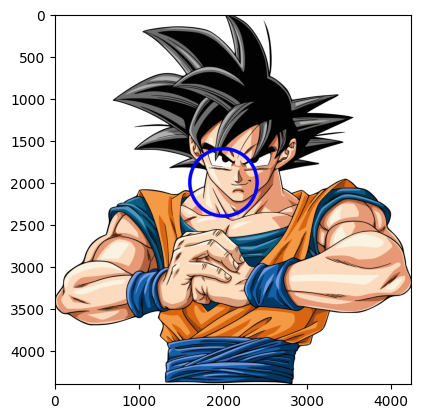

In [16]:
# Einen Kreis zeichnen
image = cv.imread("Goku.png")
imageCopy = image.copy()
circle= cv.circle(imageCopy,(zx.value,zy.value),(rad.value),(fb.value,fg.value,fr.value), ct.value) # -1 erstellt einen gefüllten Kreis
plt.imshow(cv.cvtColor(circle, cv.COLOR_BGR2RGB))

### SciPy - Bild weichzeichnen

SciPy wird für mathematische und wissenschaftliche Berechnungen verwendet. Mit dem Submodul scipy.ndimage können auch Bilder verarbeitet werden, da diese n-dimensionalen Bildern entsprechen.

In [17]:
print('Weichzeichnen:')
wz = wg.IntSlider( value=20,min=0,step=1, max=100)
display(wz)

Weichzeichnen:


IntSlider(value=20)

[]

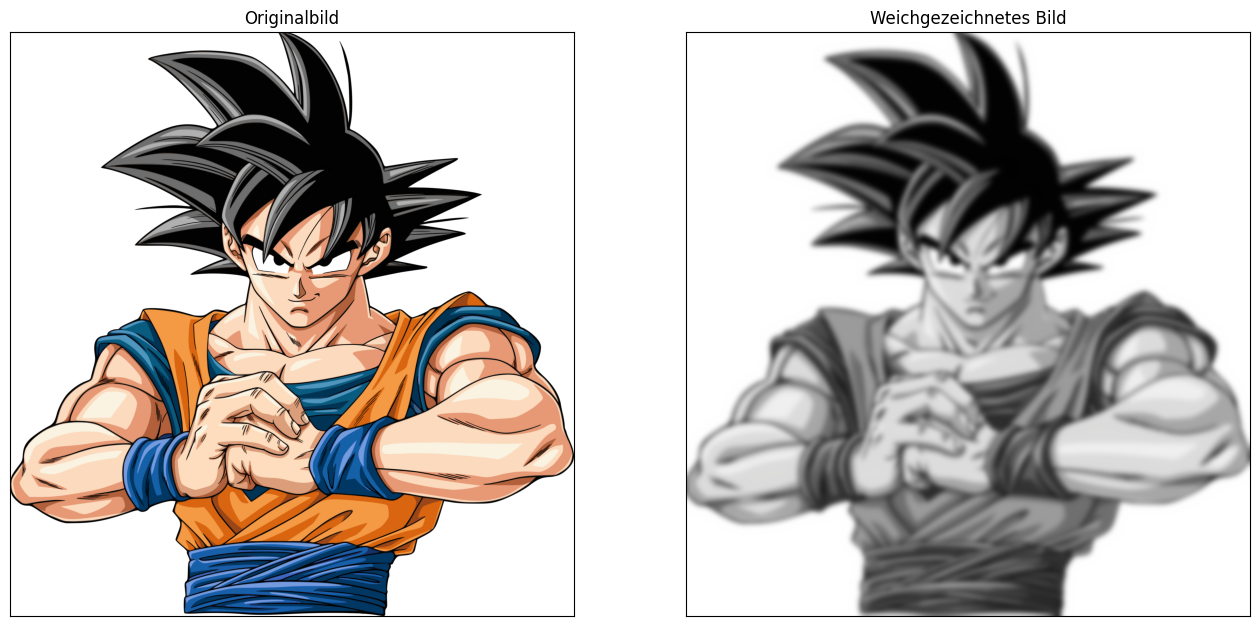

In [18]:
face = plt.imread('Goku.png')
blurred_face = ndimage.gaussian_filter(face, sigma=wz.value)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(face)
ax[0].set_title("Originalbild")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(blurred_face)
ax[1].set_title("Weichgezeichnetes Bild")
ax[1].set_xticks([])
ax[1].set_yticks([])

### PIL (Python Imaging Library)

In [19]:
print('Intensität:')
it = wg.FloatSlider( value=1.5,min=0,step=0.1, max=10)
display(it)

Intensität:


FloatSlider(value=1.5, max=10.0)

##### Kontrast

In [24]:
from PIL import ImageEnhance
im = Image.open('Goku.png')

enh = ImageEnhance.Contrast(im)
enh.enhance(it.value).show()

##### Farbintensität

In [32]:
enhc = ImageEnhance.Color(im)
enhc.enhance(it.value).show()

##### Helligkeit

In [37]:
enhb = ImageEnhance.Brightness(im)
enhb.enhance(it.value).show()

##### Anzeigen der 3 Farbkanäle

Jeweils 2 der 3 Farbkanäle werden auf den Wert 0 gesetzt wodurch ein Bild entsteht welches nur aus einer der 3 Farben besteht.

In [21]:
im = np.array(Image.open('Goku.png'))

im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0

im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)

pil_img = Image.fromarray(im_RGB)
pil_img.show()

Quellen:
https://neptune.ai/blog/image-processing-python-libraries-for-machine-learning
https://www.datacamp.com/tutorial/face-detection-python-opencv
https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html